# E20- Neural Networks in Keras 

Use keras framework to solve the below exercises.


In [1]:
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
from keras import backend as K

Using TensorFlow backend.


## 20.1 Predicting Student Admissions with Neural Networks

In this notebook, we predict student admissions to graduate schools based on six pieces of data:

1. GRE Scores (Test)
2. TOEFL Scores (Test)
3. University Ranking (1-5)
4. Statement of Purpose (SOP) and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA Scores (Grades)
6. Research Experience ( either 0 or 1 )

**Exercise:** Design and train a shallow neural network to predict the chance of Admission for each entry. Choose the number of hidden layer and neurons that minimizes the error. 

In [2]:
# Import dataset

data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
X = data.drop(data.columns[-1], axis=1)
Y = data[data.columns[-1]]

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=22)


# Normalize Data
from sklearn.preprocessing import StandardScaler

# Define the Preprocessing Method and Fit Training Data to it
scaler = StandardScaler()
scaler.fit(X)

# Make X_train to be the Scaled Version of Data
# This process scales all the values in all 6 columns and replaces them with the new values
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [7]:
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras

In [8]:
# As it is a regression problem the output is a neuron.
output_var = 1
print(output_var, ' output variables')


dims = X_train.shape[1]
print(dims, 'input variables')


1  output variables
7 input variables


In [9]:
# Parameters
learning_rate = 0.01
training_epochs = 150
display_step = 1

In [10]:
K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

print(model.summary())

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit( X_train,  Y_train, verbose=2,epochs=15)

Building model...
Model variables:  7
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
 - 0s - loss: 1.0852
Epoch 2/15
 - 0s - loss: 0.6561
Epoch 3/15
 - 0s - loss: 0.4724
Epoch 4/15
 - 0s - loss: 0.3546
Epoch 5/15
 - 0s - loss: 0.2746
Epoch 6/15
 - 0s - loss: 0.2161
Epoch 7/15
 - 0s - loss: 0.1743
Epoch 8/15
 - 0s - loss: 0.1434
Epoch 9/15
 - 0s - loss: 0.1201
Epoch 10/15
 - 0s - loss: 0.1018
Epoch 11/15
 - 0s - loss: 0.0874
Epoch 12/15
 - 0s - loss: 0.0761
Epoch 13/15
 - 0s - loss: 0.0668
Epoch 14/15
 - 0s - loss: 0.0592
Epoch 15/15
 - 0s - loss: 0.0527


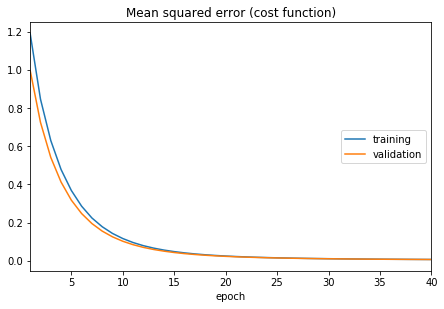

In [11]:
import keras.optimizers as opts

K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

op = opts.SGD(lr=learning_rate)

model.compile(loss = 'mean_squared_error',
              optimizer = op)

model.fit(X_train, Y_train,
          verbose=1, 
          epochs=40, 
          validation_data=[X_test,Y_test],
          callbacks=[PlotLossesKeras()])

In [12]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [13]:
K.clear_session()

Train on 350 samples, validate on 150 samples
Epoch 1/400
350/350 [==============================] - 1s 1ms/step - loss: 0.9386 - acc: 0.0000e+00 - val_loss: 0.8722 - val_acc: 0.0000e+00
Epoch 2/400
350/350 [==============================] - 0s 37us/step - loss: 0.9200 - acc: 0.0000e+00 - val_loss: 0.8561 - val_acc: 0.0000e+00
Epoch 3/400
350/350 [==============================] - 0s 37us/step - loss: 0.9026 - acc: 0.0000e+00 - val_loss: 0.8406 - val_acc: 0.0000e+00
Epoch 4/400
350/350 [==============================] - 0s 40us/step - loss: 0.8853 - acc: 0.0000e+00 - val_loss: 0.8263 - val_acc: 0.0000e+00
Epoch 5/400
350/350 [==============================] - 0s 40us/step - loss: 0.8695 - acc: 0.0000e+00 - val_loss: 0.8129 - val_acc: 0.0000e+00
Epoch 6/400
350/350 [==============================] - 0s 43us/step - loss: 0.8547 - acc: 0.0000e+00 - val_loss: 0.8002 - val_acc: 0.0000e+00
Epoch 7/400
350/350 [==============================] - 0s 43us/step - loss: 0.8402 - acc: 0.0000e+00 - 

350/350 [==============================] - 0s 0us/step - loss: 0.6109 - acc: 0.0000e+00 - val_loss: 0.6123 - val_acc: 0.0000e+00
Epoch 59/400
350/350 [==============================] - 0s 0us/step - loss: 0.6092 - acc: 0.0000e+00 - val_loss: 0.6107 - val_acc: 0.0000e+00
Epoch 60/400
350/350 [==============================] - 0s 0us/step - loss: 0.6075 - acc: 0.0000e+00 - val_loss: 0.6093 - val_acc: 0.0000e+00
Epoch 61/400
350/350 [==============================] - 0s 0us/step - loss: 0.6058 - acc: 0.0000e+00 - val_loss: 0.6078 - val_acc: 0.0000e+00
Epoch 62/400
350/350 [==============================] - 0s 0us/step - loss: 0.6042 - acc: 0.0000e+00 - val_loss: 0.6064 - val_acc: 0.0000e+00
Epoch 63/400
350/350 [==============================] - 0s 45us/step - loss: 0.6026 - acc: 0.0000e+00 - val_loss: 0.6050 - val_acc: 0.0000e+00
Epoch 64/400
350/350 [==============================] - 0s 45us/step - loss: 0.6011 - acc: 0.0000e+00 - val_loss: 0.6037 - val_acc: 0.0000e+00
Epoch 65/400
350/

350/350 [==============================] - 0s 45us/step - loss: 0.5591 - acc: 0.0000e+00 - val_loss: 0.5668 - val_acc: 0.0000e+00
Epoch 116/400
350/350 [==============================] - 0s 45us/step - loss: 0.5587 - acc: 0.0000e+00 - val_loss: 0.5665 - val_acc: 0.0000e+00
Epoch 117/400
350/350 [==============================] - 0s 45us/step - loss: 0.5584 - acc: 0.0000e+00 - val_loss: 0.5662 - val_acc: 0.0000e+00
Epoch 118/400
350/350 [==============================] - 0s 45us/step - loss: 0.5580 - acc: 0.0000e+00 - val_loss: 0.5659 - val_acc: 0.0000e+00
Epoch 119/400
350/350 [==============================] - 0s 45us/step - loss: 0.5577 - acc: 0.0000e+00 - val_loss: 0.5656 - val_acc: 0.0000e+00
Epoch 120/400
350/350 [==============================] - 0s 45us/step - loss: 0.5574 - acc: 0.0000e+00 - val_loss: 0.5653 - val_acc: 0.0000e+00
Epoch 121/400
350/350 [==============================] - 0s 45us/step - loss: 0.5571 - acc: 0.0000e+00 - val_loss: 0.5650 - val_acc: 0.0000e+00
Epoch 

Epoch 172/400
350/350 [==============================] - 0s 40us/step - loss: 0.5490 - acc: 0.0000e+00 - val_loss: 0.5578 - val_acc: 0.0000e+00
Epoch 173/400
350/350 [==============================] - 0s 40us/step - loss: 0.5489 - acc: 0.0000e+00 - val_loss: 0.5577 - val_acc: 0.0000e+00
Epoch 174/400
350/350 [==============================] - 0s 40us/step - loss: 0.5488 - acc: 0.0000e+00 - val_loss: 0.5577 - val_acc: 0.0000e+00
Epoch 175/400
350/350 [==============================] - 0s 43us/step - loss: 0.5488 - acc: 0.0000e+00 - val_loss: 0.5576 - val_acc: 0.0000e+00
Epoch 176/400
350/350 [==============================] - 0s 46us/step - loss: 0.5487 - acc: 0.0000e+00 - val_loss: 0.5576 - val_acc: 0.0000e+00
Epoch 177/400
350/350 [==============================] - 0s 40us/step - loss: 0.5486 - acc: 0.0000e+00 - val_loss: 0.5575 - val_acc: 0.0000e+00
Epoch 178/400
350/350 [==============================] - 0s 40us/step - loss: 0.5486 - acc: 0.0000e+00 - val_loss: 0.5574 - val_acc: 0.0

350/350 [==============================] - 0s 45us/step - loss: 0.5468 - acc: 0.0000e+00 - val_loss: 0.5560 - val_acc: 0.0000e+00
Epoch 229/400
350/350 [==============================] - 0s 45us/step - loss: 0.5467 - acc: 0.0000e+00 - val_loss: 0.5560 - val_acc: 0.0000e+00
Epoch 230/400
350/350 [==============================] - 0s 45us/step - loss: 0.5467 - acc: 0.0000e+00 - val_loss: 0.5560 - val_acc: 0.0000e+00
Epoch 231/400
350/350 [==============================] - 0s 45us/step - loss: 0.5467 - acc: 0.0000e+00 - val_loss: 0.5559 - val_acc: 0.0000e+00
Epoch 232/400
350/350 [==============================] - 0s 45us/step - loss: 0.5467 - acc: 0.0000e+00 - val_loss: 0.5559 - val_acc: 0.0000e+00
Epoch 233/400
350/350 [==============================] - 0s 45us/step - loss: 0.5467 - acc: 0.0000e+00 - val_loss: 0.5559 - val_acc: 0.0000e+00
Epoch 234/400
350/350 [==============================] - 0s 45us/step - loss: 0.5467 - acc: 0.0000e+00 - val_loss: 0.5559 - val_acc: 0.0000e+00
Epoch 

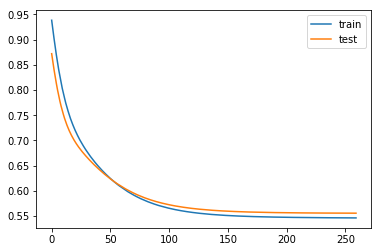

In [14]:

# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot



model = Sequential()
model.add(Dense(output_var, input_shape=(dims,) , activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

'''
model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))
op = opts.SGD(lr=learning_rate)
model.compile(loss = 'mean_squared_error',optimizer = op)
'''

# simple early stopping
es = EarlyStopping(monitor='val_loss', verbose=1)
# fit model
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=400, verbose=1, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test,Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


# 20.2 Decision Boundary --  Moons Dataset 

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

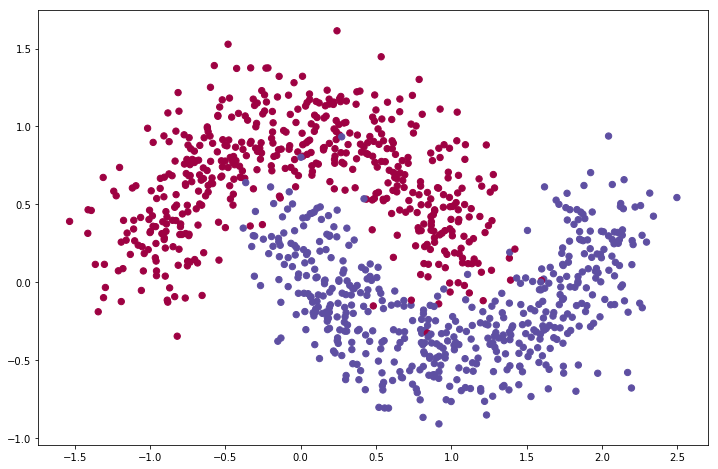

In [15]:
# Create moons dataset.

from sklearn.datasets.samples_generator import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
x_test, y_test = make_moons(n_samples=100, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

**Hint:** Use the next function to plt the decision boundary,

In [16]:
# Parameters
learning_rate = 0.01
training_epochs = 150
display_step = 1

# As it is a regression problem the output is a neuron.


output_var = 1
print(output_var, ' output variables')

dims = x_train.shape[1]
print(dims, 'input variables')

1  output variables
2 input variables


Train on 1000 samples, validate on 100 samples
Epoch 1/400
1000/1000 [==============================] - 1s 627us/step - loss: 0.9889 - acc: 0.3380 - val_loss: 0.9637 - val_acc: 0.3400
Epoch 2/400
1000/1000 [==============================] - 0s 31us/step - loss: 0.9661 - acc: 0.3460 - val_loss: 0.9433 - val_acc: 0.3500
Epoch 3/400
1000/1000 [==============================] - 0s 31us/step - loss: 0.9445 - acc: 0.3640 - val_loss: 0.9240 - val_acc: 0.3500
Epoch 4/400
1000/1000 [==============================] - 0s 31us/step - loss: 0.9236 - acc: 0.3740 - val_loss: 0.9055 - val_acc: 0.3500
Epoch 5/400
1000/1000 [==============================] - 0s 31us/step - loss: 0.9031 - acc: 0.3880 - val_loss: 0.8876 - val_acc: 0.3500
Epoch 6/400
1000/1000 [==============================] - 0s 47us/step - loss: 0.8833 - acc: 0.4050 - val_loss: 0.8698 - val_acc: 0.3500
Epoch 7/400
1000/1000 [==============================] - 0s 47us/step - loss: 0.8640 - acc: 0.4210 - val_loss: 0.8526 - val_acc: 0.3700


1000/1000 [==============================] - 0s 39us/step - loss: 0.3968 - acc: 0.8760 - val_loss: 0.4323 - val_acc: 0.8500
Epoch 61/400
1000/1000 [==============================] - 0s 30us/step - loss: 0.3936 - acc: 0.8760 - val_loss: 0.4294 - val_acc: 0.8500
Epoch 62/400
1000/1000 [==============================] - 0s 31us/step - loss: 0.3905 - acc: 0.8740 - val_loss: 0.4265 - val_acc: 0.8400
Epoch 63/400
1000/1000 [==============================] - 0s 29us/step - loss: 0.3875 - acc: 0.8740 - val_loss: 0.4238 - val_acc: 0.8400
Epoch 64/400
1000/1000 [==============================] - 0s 31us/step - loss: 0.3846 - acc: 0.8700 - val_loss: 0.4210 - val_acc: 0.8400
Epoch 65/400
1000/1000 [==============================] - 0s 31us/step - loss: 0.3818 - acc: 0.8720 - val_loss: 0.4184 - val_acc: 0.8400
Epoch 66/400
1000/1000 [==============================] - 0s 31us/step - loss: 0.3790 - acc: 0.8700 - val_loss: 0.4160 - val_acc: 0.8500
Epoch 67/400
1000/1000 [==============================

Epoch 120/400
1000/1000 [==============================] - 0s 31us/step - loss: 0.3036 - acc: 0.8750 - val_loss: 0.3469 - val_acc: 0.8600
Epoch 121/400
1000/1000 [==============================] - 0s 32us/step - loss: 0.3029 - acc: 0.8750 - val_loss: 0.3463 - val_acc: 0.8600
Epoch 122/400
1000/1000 [==============================] - 0s 31us/step - loss: 0.3023 - acc: 0.8750 - val_loss: 0.3458 - val_acc: 0.8600
Epoch 123/400
1000/1000 [==============================] - 0s 37us/step - loss: 0.3017 - acc: 0.8750 - val_loss: 0.3453 - val_acc: 0.8600
Epoch 124/400
1000/1000 [==============================] - 0s 34us/step - loss: 0.3011 - acc: 0.8750 - val_loss: 0.3448 - val_acc: 0.8600
Epoch 125/400
1000/1000 [==============================] - 0s 32us/step - loss: 0.3005 - acc: 0.8750 - val_loss: 0.3443 - val_acc: 0.8600
Epoch 126/400
1000/1000 [==============================] - 0s 32us/step - loss: 0.2999 - acc: 0.8750 - val_loss: 0.3438 - val_acc: 0.8600
Epoch 127/400
1000/1000 [=========

1000/1000 [==============================] - 0s 31us/step - loss: 0.2810 - acc: 0.8750 - val_loss: 0.3293 - val_acc: 0.8600
Epoch 180/400
1000/1000 [==============================] - 0s 31us/step - loss: 0.2808 - acc: 0.8750 - val_loss: 0.3292 - val_acc: 0.8600
Epoch 181/400
1000/1000 [==============================] - 0s 31us/step - loss: 0.2806 - acc: 0.8750 - val_loss: 0.3291 - val_acc: 0.8600
Epoch 182/400
1000/1000 [==============================] - 0s 29us/step - loss: 0.2804 - acc: 0.8750 - val_loss: 0.3290 - val_acc: 0.8600
Epoch 183/400
1000/1000 [==============================] - 0s 36us/step - loss: 0.2803 - acc: 0.8750 - val_loss: 0.3290 - val_acc: 0.8500
Epoch 184/400
1000/1000 [==============================] - 0s 33us/step - loss: 0.2801 - acc: 0.8750 - val_loss: 0.3287 - val_acc: 0.8600
Epoch 185/400
1000/1000 [==============================] - 0s 29us/step - loss: 0.2799 - acc: 0.8750 - val_loss: 0.3286 - val_acc: 0.8600
Epoch 186/400
1000/1000 [=======================

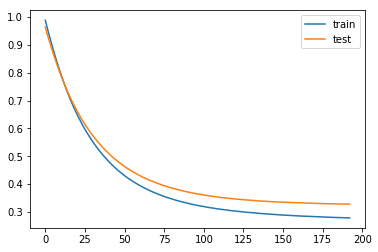

In [17]:
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot


model = Sequential()
model.add(Dense(output_var, input_shape=(dims,) , activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# simple early stopping
es = EarlyStopping(monitor='val_loss', verbose=1)
# fit model
history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=400, verbose=1, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(x_train,y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()